In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Upload the Excel file
from google.colab import files
data = files.upload()

Saving indigineous data.csv to indigineous data.csv


In [3]:
# Read the CSV file
df = pd.read_csv("indigineous data.csv")

In [4]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Indigenous       989 non-null    object
 1   Education        989 non-null    object
 2   Weekly Hours     989 non-null    int64 
 3   Weekly Wage      989 non-null    int64 
 4   Total Employees  989 non-null    int64 
 5   Gender           989 non-null    object
 6   Age Group        989 non-null    object
dtypes: int64(3), object(4)
memory usage: 54.2+ KB


In [5]:
df

,Indigenous,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group
0,Yes,High School,35,500,50,Male,25-34
1,Yes,Bachelor's,40,800,60,Female,35-44
2,No,Master's,45,1200,45,Male,45-54
3,No,High School,30,400,55,Female,25-34
4,Yes,Associate's,38,700,70,Male,55-64
...,...,...,...,...,...,...,...
984,Yes,Associate's,39,2286,500,Male,55-162
985,No,Doctorate,27,1776,242,Female,35-142
986,No,High School,43,2147,388,Male,25-132
987,No,Bachelor's,31,1426,128,Female,45-152


In [6]:
#Replacing the age group with correct range
import re

age_group_regex = {
    r'25-\d+': '25-34',
    r'35-\d+': '35-44',
    r'45-\d+': '45-54',
    r'55-\d+': '55+',
}

# Function to apply the mapping
def correct_age_group(age_group):
    for pattern, replacement in age_group_regex.items():
        if re.match(pattern, age_group):
            return replacement
    return age_group

In [7]:
# Apply the correction to the Age Group column
df['Age Group'] = df['Age Group'].apply(correct_age_group)
# Check the corrected data
print(df['Age Group'].unique())

['25-34' '35-44' '45-54' '55+']


In [8]:
df

,Indigenous,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group
0,Yes,High School,35,500,50,Male,25-34
1,Yes,Bachelor's,40,800,60,Female,35-44
2,No,Master's,45,1200,45,Male,45-54
3,No,High School,30,400,55,Female,25-34
4,Yes,Associate's,38,700,70,Male,55+
...,...,...,...,...,...,...,...
984,Yes,Associate's,39,2286,500,Male,55+
985,No,Doctorate,27,1776,242,Female,35-44
986,No,High School,43,2147,388,Male,25-34
987,No,Bachelor's,31,1426,128,Female,45-54


In [9]:
#As Indigenous is categorical data we need to convert it to numerical data for clustering
#Therefore performing one hot encoding for 'Indigenous'

one_hot_encoded_data = pd.get_dummies(df.Indigenous)
one_hot_encoded_data = one_hot_encoded_data.astype(int)
one_hot_encoded_data.head()  #Source: https://www.geeksforgeeks.org/ml-one-hot-encoding/

,No,Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [10]:
df = pd.concat([df, one_hot_encoded_data], axis = 1)
df.head()

,Indigenous,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group,No,Yes
0,Yes,High School,35,500,50,Male,25-34,0,1
1,Yes,Bachelor's,40,800,60,Female,35-44,0,1
2,No,Master's,45,1200,45,Male,45-54,1,0
3,No,High School,30,400,55,Female,25-34,1,0
4,Yes,Associate's,38,700,70,Male,55+,0,1


In [11]:
df = df.drop(['Indigenous', 'No'], axis = 1)
df.head()

,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group,Yes
0,High School,35,500,50,Male,25-34,1
1,Bachelor's,40,800,60,Female,35-44,1
2,Master's,45,1200,45,Male,45-54,0
3,High School,30,400,55,Female,25-34,0
4,Associate's,38,700,70,Male,55+,1


In [12]:
df = df.rename(columns={'Yes': 'Indigenous'})
df.head() #Now we can see that the Indigenous column is converted to the numerical data using one hot encoding

,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group,Indigenous
0,High School,35,500,50,Male,25-34,1
1,Bachelor's,40,800,60,Female,35-44,1
2,Master's,45,1200,45,Male,45-54,0
3,High School,30,400,55,Female,25-34,0
4,Associate's,38,700,70,Male,55+,1


In [13]:
#Similarly, gender Column is also converted to the numnerical data using one-hot encoding
one_hot_encoded_data = pd.get_dummies(df.Gender)
one_hot_encoded_data = one_hot_encoded_data.astype(int)
df = pd.concat([df, one_hot_encoded_data], axis = 1)
df = df.drop(['Gender', 'Female'], axis = 1)
df.head()


,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,High School,35,500,50,25-34,1,1
1,Bachelor's,40,800,60,35-44,1,0
2,Master's,45,1200,45,45-54,0,1
3,High School,30,400,55,25-34,0,0
4,Associate's,38,700,70,55+,1,1


In [14]:
#Now we can see that Education and Age group are ordinal categorical variables
#Therefore, it is appropriate to use ordinal encoding Source: https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10

education_mapping = {
    'High School': 0,
    'Associate\'s': 1,
    'Bachelor\'s': 2,
    'Master\'s': 3,
    'Doctorate': 4
}

age_group_mapping = {
    '25-34': 0,
    '35-44': 1,
    '45-54': 2,
    '55+': 3
}

df['Education'] = df['Education'].map(education_mapping)
df['Age Group'] = df['Age Group'].map(age_group_mapping)

df.head()


,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,0,35,500,50,0,1,1
1,2,40,800,60,1,1,0
2,3,45,1200,45,2,0,1
3,0,30,400,55,0,0,0
4,1,38,700,70,3,1,1


In [15]:
#data exploration
# Initial scatter plot of the data
#import plotly.express as px
#fig = px.scatter_matrix(df,width=1600, height=1600)
#fig.show()

In [16]:
df.describe()

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,1.498483,37.686552,1374.232558,259.861476,1.000000,0.332659,0.500506
std,1.432435,7.461835,661.296231,136.834174,1.001012,0.471404,0.500253
min,0.000000,25.000000,250.000000,21.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,802.000000,146.000000,0.000000,0.000000,0.000000
50%,1.000000,38.000000,1371.000000,259.000000,1.000000,0.000000,1.000000
75%,3.000000,44.000000,1953.000000,370.000000,2.000000,1.000000,1.000000
max,4.000000,50.000000,2500.000000,500.000000,3.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Weekly Hours'}>,
        <Axes: title={'center': 'Weekly Wage'}>],
       [<Axes: title={'center': 'Total Employees'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Indigenous'}>],
       [<Axes: title={'center': 'Male'}>, <Axes: >, <Axes: >]],
      dtype=object)

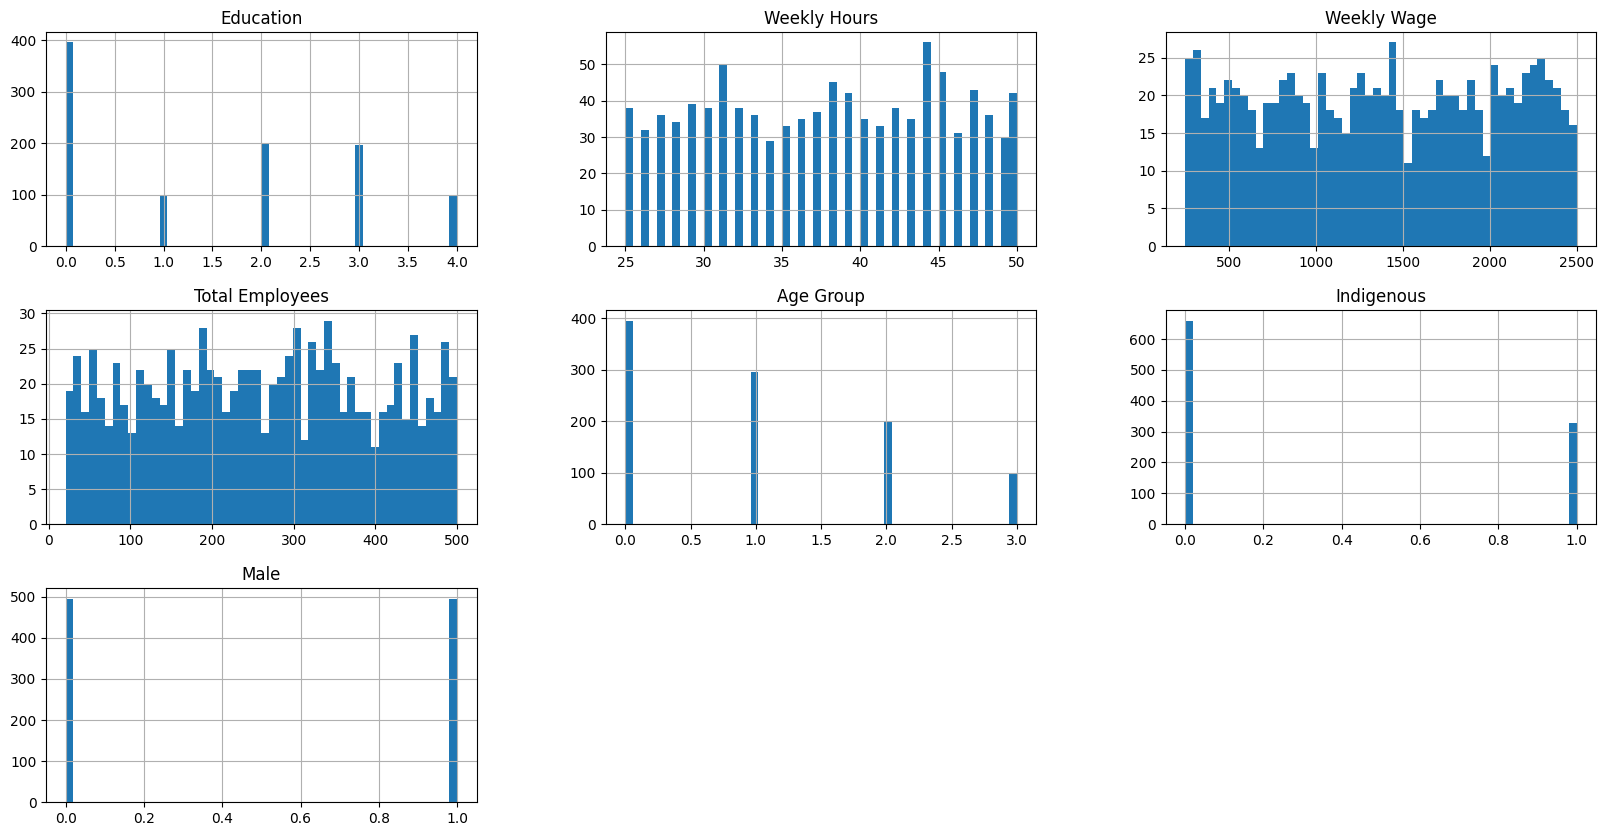

In [17]:
df.hist(bins = 50, figsize=(20,10))

In [18]:
#Feature Scaling

scaler = MinMaxScaler()
df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous',
    'Male']] = scaler.fit_transform(df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees',
                                        'Age Group', 'Indigenous', 'Male']])
df.head()

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Weekly Hours'}>,
        <Axes: title={'center': 'Weekly Wage'}>],
       [<Axes: title={'center': 'Total Employees'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Indigenous'}>],
       [<Axes: title={'center': 'Male'}>, <Axes: >, <Axes: >]],
      dtype=object)

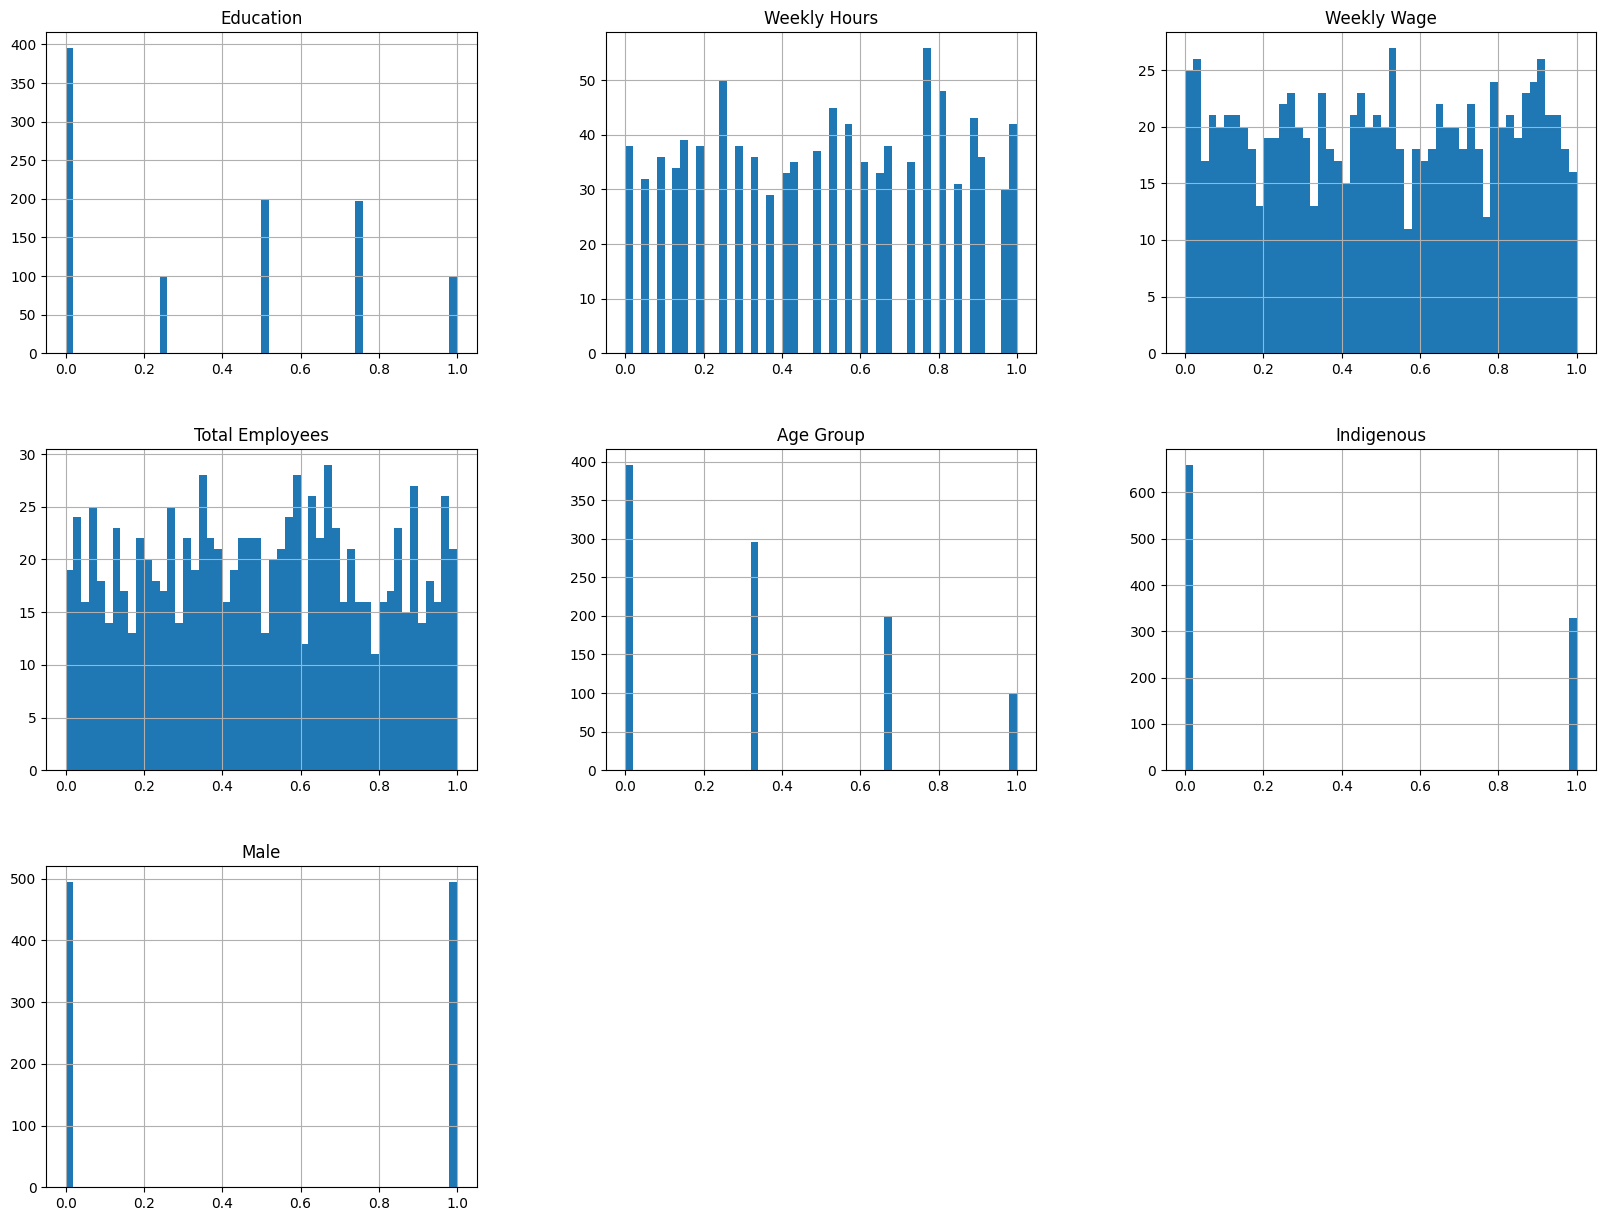

In [19]:
#data exploration
df.hist(bins = 50, figsize=(20,15))

In [20]:
#Model Implementation ---> K means Clustering

# Applying KMeans algorithm to the scaled data taking all columns as features
kmean = KMeans(n_clusters=3)

y_pred = kmean.fit_predict(df[['Education', 'Weekly Hours',
                              'Weekly Wage', 'Total Employees',
                             'Age Group', 'Indigenous', 'Male']])


In [21]:
# Assigning the cluster labels to the dataframe
df['cluster'] = y_pred
df

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,0
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,2
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,1
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,2
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,0
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,0
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,2
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,0
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,2


In [22]:
# Separating the data points based on clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


df1
#df4

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.0,1.0,1.0,0
4,0.25,0.52,0.200000,0.102296,1.0,1.0,1.0,0
6,0.00,0.28,0.155556,0.091858,0.0,1.0,1.0,0
8,0.00,0.40,0.111111,0.112735,0.0,1.0,1.0,0
10,0.00,0.48,0.838222,0.463466,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...
978,0.00,0.00,0.523111,0.803758,0.0,1.0,1.0,0
980,0.00,0.56,0.613333,0.231733,0.0,0.0,1.0,0
984,0.25,0.56,0.904889,1.000000,1.0,1.0,1.0,0
986,0.00,0.72,0.843111,0.766180,0.0,0.0,1.0,0


In [23]:
# Elbow curve
sse = []

# Iterate through a range of K values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Education', 'Weekly Hours',
                             'Weekly Wage', 'Total Employees',
                              'Age Group', 'Indigenous', 'Male']])



    sse.append(kmeans.inertia_)  # inertia_ gives the SSE

sse

[957.497320577834,
 663.318951394233,
 501.3948387808102,
 448.2448907106465,
 392.66867644432716,
 338.27217540105323,
 282.695961134734,
 272.14063954393475,
 245.7493009397038,
 253.84898628709115]

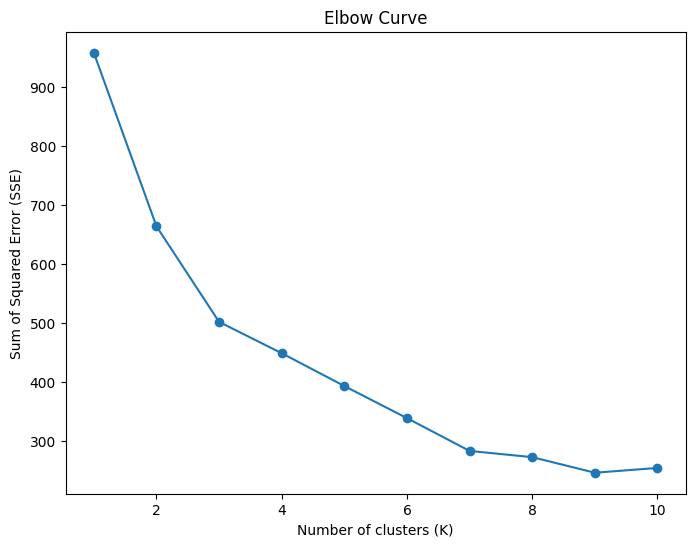

In [24]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [25]:
# Calculate percentage decrease in SSE

for i in range(1, len(sse)):
    percentage_decrease = (sse[i-1] - sse[i]) / sse[i-1] * 100
    print(f"K={i+1}: SSE decrease = {percentage_decrease:.2f}%")

K=2: SSE decrease = 30.72%
K=3: SSE decrease = 24.41%
K=4: SSE decrease = 10.60%
K=5: SSE decrease = 12.40%
K=6: SSE decrease = 13.85%
K=7: SSE decrease = 16.43%
K=8: SSE decrease = 3.73%
K=9: SSE decrease = 9.70%
K=10: SSE decrease = -3.30%


In [26]:
#performance evaluation
from sklearn.metrics import silhouette_score

#df_demographics = df[['Education','Age Group', 'Indigenous', 'Male']]

df_check_sil = df[['Education', 'Weekly Hours',
                             'Weekly Wage', 'Total Employees',
                              'Age Group', 'Indigenous', 'Male']]

silhouette_avg = silhouette_score(df_check_sil, y_pred)
silhouette_avg

0.2985051132796844

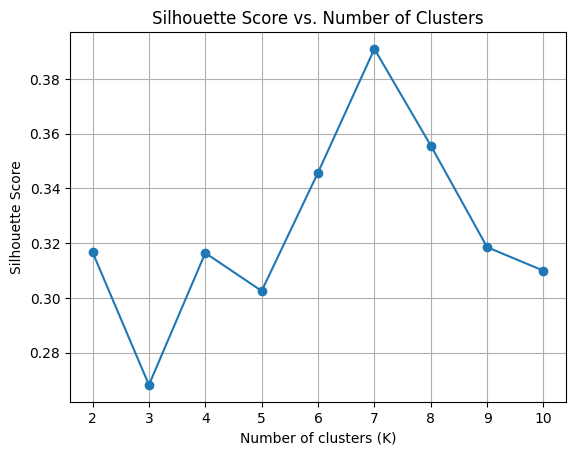

In [27]:
# Iterate through a range of K values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(df_check_sil)
    silhouette_avg = silhouette_score(df_check_sil, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [28]:
#import plotly.express as px
#fig = px.scatter_matrix(df,
#width=1200, height=1600)
#fig.show()

In [38]:
#Model Implementation ---> K means Clustering

# Applying KMeans algorithm to the scaled data considering only demographic features
kmean = KMeans(n_clusters=3)

#y_pred = kmean.fit_predict(df[['Education', 'Weekly Hours',
                             # 'Weekly Wage', 'Total Employees',
                             # 'Age Group', 'Indigenous', 'Male']])

y_pred = kmean.fit_predict(df[['Education','Age Group', 'Indigenous', 'Male']])  #Considering only demographic features
y_pred


#df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous', 'Male']]

array([0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2,
       0, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [39]:
# Assigning the cluster labels to the dataframe
df['cluster'] = y_pred
df

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,0
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,2
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,0
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,1
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,2
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,2
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,1
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,0
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,1


In [40]:
#performance evaluation
from sklearn.metrics import silhouette_score

df_demographics = df[['Education','Age Group', 'Indigenous', 'Male']]

silhouette_avg = silhouette_score(df_demographics, y_pred)
silhouette_avg

0.48036364668713083

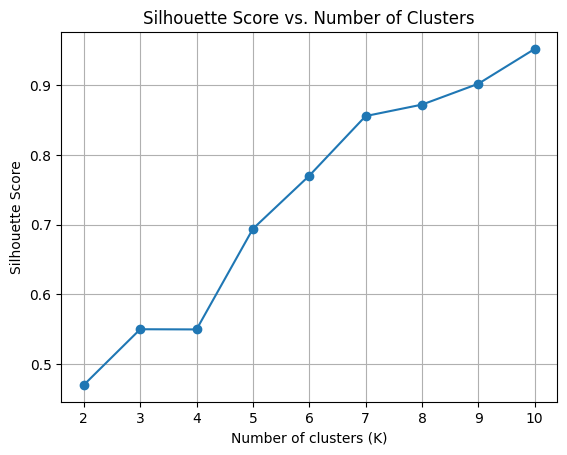

In [41]:
# Iterate through a range of K values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(df_demographics)
    silhouette_avg = silhouette_score(df_demographics, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

In [42]:
print(df['cluster'].value_counts())

cluster
1    432
0    424
2    133
Name: count, dtype: int64


In [43]:
df

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,0
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,2
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,0
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,1
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,2
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,2
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,1
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,0
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,1


In [44]:
df_clusters = df[['Education','Age Group', 'Indigenous', 'Male', 'cluster']]
df_clusters

,Education,Age Group,Indigenous,Male,cluster
0,0.00,0.000000,1.0,1.0,0
1,0.50,0.333333,1.0,0.0,2
2,0.75,0.666667,0.0,1.0,0
3,0.00,0.000000,0.0,0.0,1
4,0.25,1.000000,1.0,1.0,2
...,...,...,...,...,...
984,0.25,1.000000,1.0,1.0,2
985,1.00,0.333333,0.0,0.0,1
986,0.00,0.000000,0.0,1.0,0
987,0.50,0.666667,0.0,0.0,1


In [45]:
polar=df_clusters.groupby("cluster").mean().reset_index()
#polar
# Reindex columns to swap "Male" and "Education"
#polar = polar.reindex(columns=['cluster', 'Male', 'Age Group', 'Indigenous', 'Education'])
polar

,cluster,Education,Age Group,Indigenous,Male
0,0,0.191627,0.221698,0.462264,1.000000
1,1,0.556713,0.333333,0.000000,0.000000
2,2,0.366541,0.689223,1.000000,0.533835


In [46]:
import plotly.express as px
polar=pd.melt(polar,id_vars=['cluster'])
#custom_colors = ['#1f77b4', '#d62728', '#ffff44', '#2ca02c']
fig4 = px.line_polar(polar, r="value",
                     theta="variable",
                     color="cluster",
                     line_close=True,
                     height=600,width=1000)

fig4.show()